In [51]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [52]:
# Load .env enviroment variables
load_dotenv()

True

In [53]:
# Set Alpaca API key and secret
alpaca_api_key = os.environ["ALPACA_API_KEY"]
alpaca_secret_key = os.environ["ALPACA_SECRET_KEY"]

api = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version = "v2"
)


## Part 1 - Personal Finance Planner

In [54]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [55]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [56]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [57]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
btc_price = btc["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth = requests.get(eth_url).json()
eth_price = eth["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13661.32
The current value of your 5.3 ETH is $1956.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [58]:
# Current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
        "shares":[200, 50]
}

tickers = ["AGG", "SPY"]

#Create the shares DataFrame
shares = pd.DataFrame(shares_data, index=tickers)
shares

,shares
AGG,200
SPY,50


In [59]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [60]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio =alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = start_date
).df



# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio["AGG"]["close"])
spy_close_price=float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")
df_portfolio.head()

Current AGG closing price: $112.91
Current SPY closing price: $296.01


AGG                                      SPY  \
                             open    high     low   close   volume    open   
2019-10-14 00:00:00-04:00  112.93  112.93  112.82  112.91  1546071  295.93   

                                                             
                             high     low   close    volume  
2019-10-14 00:00:00-04:00  296.67  295.57  296.01  31580316

In [61]:
# Compute the current value of shares
my_agg_value = agg_close_price * shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * shares.loc["SPY"]["shares"]


# Print current value of share
print(f"The current value of the {shares.loc['AGG']['shares']} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of the {shares.loc['SPY']['shares']} SPY shares is ${my_spy_value:0.2f}")

The current value of the 200 AGG shares is $22582.00
The current value of the 50 SPY shares is $14800.50


### Savings Health Analysis

In [62]:
# Create savings DataFrame
df_savings = ['crypto', 'shares']

savings_value = [my_spy_value+my_agg_value, my_btc_value+my_eth_value]
df_save= pd.DataFrame(savings_value, index=df_savings, columns=["Amount"])


# Display savings DataFrame
df_save

,Amount
crypto,37382.50
shares,15617.44


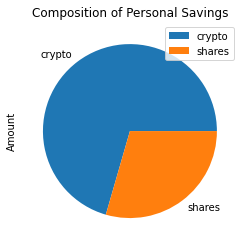

In [63]:
# Plot savings pie chart
df_save.plot.pie(y="Amount", title="Composition of Personal Savings")

In [65]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
if savings_value > emergency_fund:
    print("Congratulations, you have more than enough money in your emergency fund. Buy yourself something nice!")
elif savings_value  == emergency_fund:
    print("Congratulations, you have reached your financial goal! Keep investing! ")
else:
    df_savings < emergency_fund
    print("Keep saving, you will get there!")

# Validate saving health
# YOUR CODE HERE!

TypeError: '>' not supported between instances of 'list' and 'int'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [66]:
# Set start and end dates of five years back from today.
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    #weights = [.60,.40],
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

NameError: name 'df_ticker' is not defined

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [ ]:
# Printing the simulation input data
print(MC_stock_data)

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
line_plot = MC_thirtyyear.plot_simulation()

# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_SPY = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

MC_SPY.calc_cumulative_return()


In [ ]:
# Plot simulation outcomes
df_stock_data.plot(title="500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")